# Deterministic trend in stock prices

In this notebook we will compute the drift of microsoft stock prices. We will use parameters determined here while training the machine learning model that captures stochastic behavior. Our goal is to model the closing price of the stock.

In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Downloading Microsoft stock data from 2020-present

In [18]:
sec_label = 'MSFT' # Microsoft
sec = yf.Ticker(sec_label)
data_download = sec.history(start = '2020-01-01')

In [19]:
data_download = data_download[data_download.Close>0]

In [20]:
data_download=data_download.drop_duplicates()

In [21]:
data_download.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,153.641577,155.528468,153.206143,155.422028,22622100,0.0,0.0
2020-01-03 00:00:00-05:00,153.196476,154.773716,152.944880,153.486755,21116200,0.0,0.0
2020-01-06 00:00:00-05:00,151.996577,153.951210,151.445017,153.883469,20813700,0.0,0.0
2020-01-07 00:00:00-05:00,154.164119,154.502783,152.228842,152.480423,21634100,0.0,0.0
2020-01-08 00:00:00-05:00,153.786731,155.596225,152.838450,154.909195,27746500,0.0,0.0


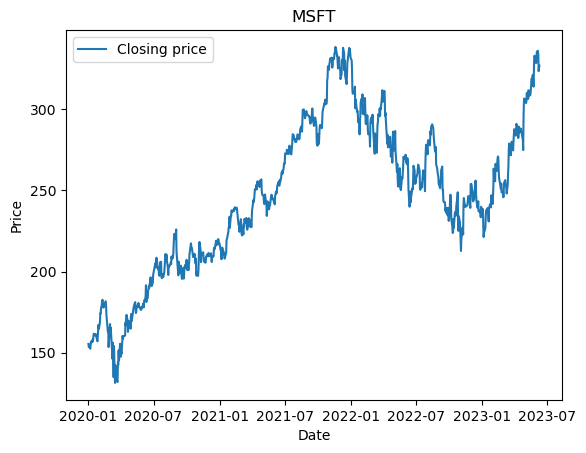

In [22]:
plt.figure(dpi=100)
plt.plot(data_download.index,data_download.Close,label = 'Closing price')
plt.plot
plt.xlabel('Date')
plt.title(sec_label)
plt.ylabel('Price')
plt.legend()
plt.show()

## Estimating S_0 and drift

In [35]:
logS = np.log(data_download.Close[0:int(0.8*len(data_download))])

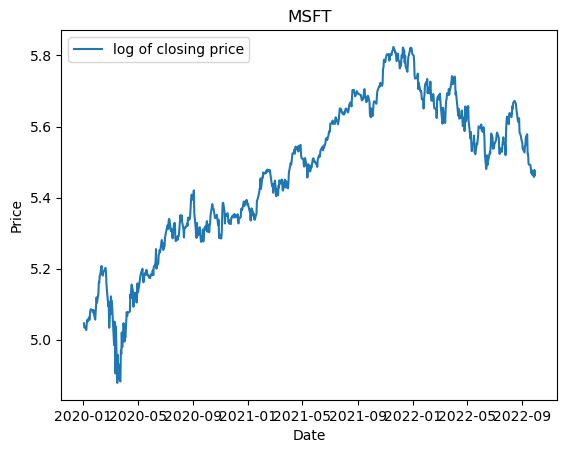

In [36]:
plt.figure(dpi=100)
plt.plot(data_download.index[0:int(0.8*len(data_download))],logS,label = 'log of closing price')
plt.plot
plt.xlabel('Date')
plt.title(sec_label)
plt.ylabel('Price')
plt.legend()
plt.show()

In [57]:
x = np.arange(len(logS)).reshape(-1,1)
y=[]
for i in range(len(logS)):
    y.append(logS[i])

In [58]:
model_linear = LinearRegression()

In [59]:
model_linear.fit(x,y)

LinearRegression()

In [60]:
model_linear.score(x,y)

0.7109276029316429

In [67]:
intercept = model_linear.intercept_
drift_coeff = model_linear.coef_[0]
print(f'''log S_0 = {intercept}
drift coefficient (with time period = 1 day) = {drift_coeff}''')

log S_0 = 5.150137561751342
drift coefficient (with time period = 1 day) = 0.0009143920969670385


In [69]:
base_stock = []
for i in range(len(data_download)):
    base_stock.append(np.exp(drift_coeff*i + intercept))

Plotting the deterministic drift

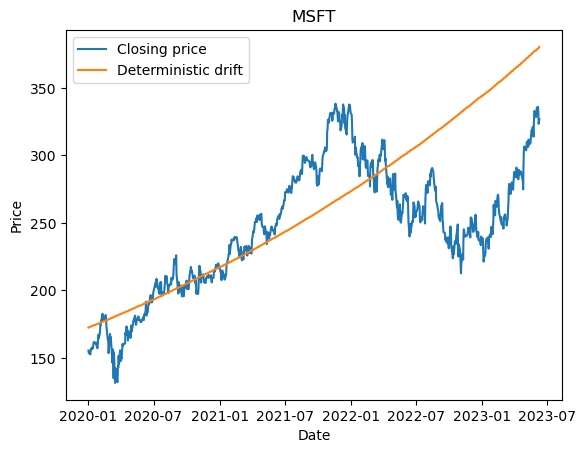

In [70]:
plt.figure(dpi=100)
plt.plot(data_download.index,data_download.Close,label = 'Closing price')
plt.plot(data_download.index,base_stock,label = 'Deterministic drift')
plt.plot
plt.xlabel('Date')
plt.title(sec_label)
plt.ylabel('Price')
plt.legend()
plt.show()

In [71]:
data_download['drift'] = base_stock

In [72]:
data_download

,Open,High,Low,Close,Volume,Dividends,Stock Splits,drift
Date,,,,,,,,
2020-01-02 00:00:00-05:00,153.641577,155.528468,153.206143,155.422028,22622100,0.0,0.0,172.455212
2020-01-03 00:00:00-05:00,153.196476,154.773716,152.944880,153.486755,21116200,0.0,0.0,172.612976
2020-01-06 00:00:00-05:00,151.996577,153.951210,151.445017,153.883469,20813700,0.0,0.0,172.770884
2020-01-07 00:00:00-05:00,154.164119,154.502783,152.228842,152.480423,21634100,0.0,0.0,172.928936
2020-01-08 00:00:00-05:00,153.786731,155.596225,152.838450,154.909195,27746500,0.0,0.0,173.087134
...,...,...,...,...,...,...,...,...
2023-06-05 00:00:00-04:00,335.220001,338.559998,334.660004,335.940002,21307100,0.0,0.0,378.959431
2023-06-06 00:00:00-04:00,335.329987,335.369995,332.170013,333.679993,20396200,0.0,0.0,379.306107
2023-06-07 00:00:00-04:00,331.649994,334.489990,322.500000,323.380005,40717100,0.0,0.0,379.653100


We will now save this data frame for future analysis. We will drop columns dividends and stock spills.

In [77]:
df = data_download.drop(columns = ['Dividends','Stock Splits'])

In [78]:
df

,Open,High,Low,Close,Volume,drift
Date,,,,,,
2020-01-02 00:00:00-05:00,153.641577,155.528468,153.206143,155.422028,22622100,172.455212
2020-01-03 00:00:00-05:00,153.196476,154.773716,152.944880,153.486755,21116200,172.612976
2020-01-06 00:00:00-05:00,151.996577,153.951210,151.445017,153.883469,20813700,172.770884
2020-01-07 00:00:00-05:00,154.164119,154.502783,152.228842,152.480423,21634100,172.928936
2020-01-08 00:00:00-05:00,153.786731,155.596225,152.838450,154.909195,27746500,173.087134
...,...,...,...,...,...,...
2023-06-05 00:00:00-04:00,335.220001,338.559998,334.660004,335.940002,21307100,378.959431
2023-06-06 00:00:00-04:00,335.329987,335.369995,332.170013,333.679993,20396200,379.306107
2023-06-07 00:00:00-04:00,331.649994,334.489990,322.500000,323.380005,40717100,379.653100


In [79]:
df.to_csv('MSFT_stock_data.csv')